In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/animals.csv", sep=',')
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
5,Dipliodocus,11700.000,50.0
6,Asian elephant,2547.000,4603.0
7,Donkey,187.100,419.0
8,Horse,521.000,655.0
9,Potar monkey,10.000,115.0


In [3]:
body = df['body']
print(type(body))
body

<class 'pandas.core.series.Series'>


0         1.350
1       465.000
2        36.330
3        27.660
4         1.040
5     11700.000
6      2547.000
7       187.100
8       521.000
9        10.000
10        3.300
11      529.000
12      207.000
13       62.000
14     6654.000
15     9400.000
16        6.800
17       35.000
18        0.120
19        0.023
20        2.500
21       55.500
22      100.000
23       52.160
24        0.280
25    87000.000
26        0.122
27      192.000
Name: body, dtype: float64

In [4]:
body = df['body'].values
brain = df['brain'].values
names = df['name'].values

In [5]:
print(body)
print(brain)

[1.350e+00 4.650e+02 3.633e+01 2.766e+01 1.040e+00 1.170e+04 2.547e+03
 1.871e+02 5.210e+02 1.000e+01 3.300e+00 5.290e+02 2.070e+02 6.200e+01
 6.654e+03 9.400e+03 6.800e+00 3.500e+01 1.200e-01 2.300e-02 2.500e+00
 5.550e+01 1.000e+02 5.216e+01 2.800e-01 8.700e+04 1.220e-01 1.920e+02]
[8.100e+00 4.230e+02 1.195e+02 1.150e+02 5.500e+00 5.000e+01 4.603e+03
 4.190e+02 6.550e+02 1.150e+02 2.560e+01 6.800e+02 4.060e+02 1.320e+03
 5.712e+03 7.000e+01 1.790e+02 5.600e+01 1.000e+00 4.000e-01 1.210e+01
 1.750e+02 1.570e+02 4.400e+02 1.900e+00 1.545e+02 3.000e+00 1.800e+02]


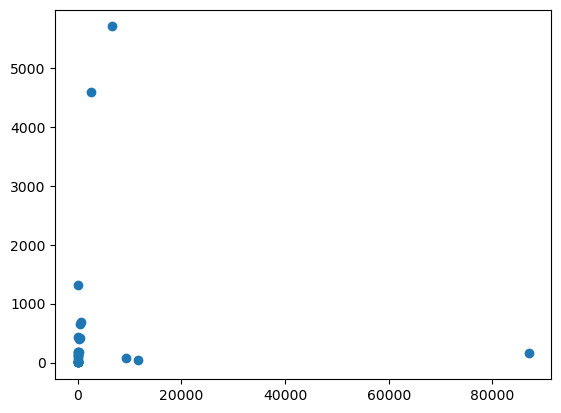

In [6]:
plt.scatter(body, brain)
plt.show()

In [7]:
body_log = np.log(body)
brain_log = np.log(brain)

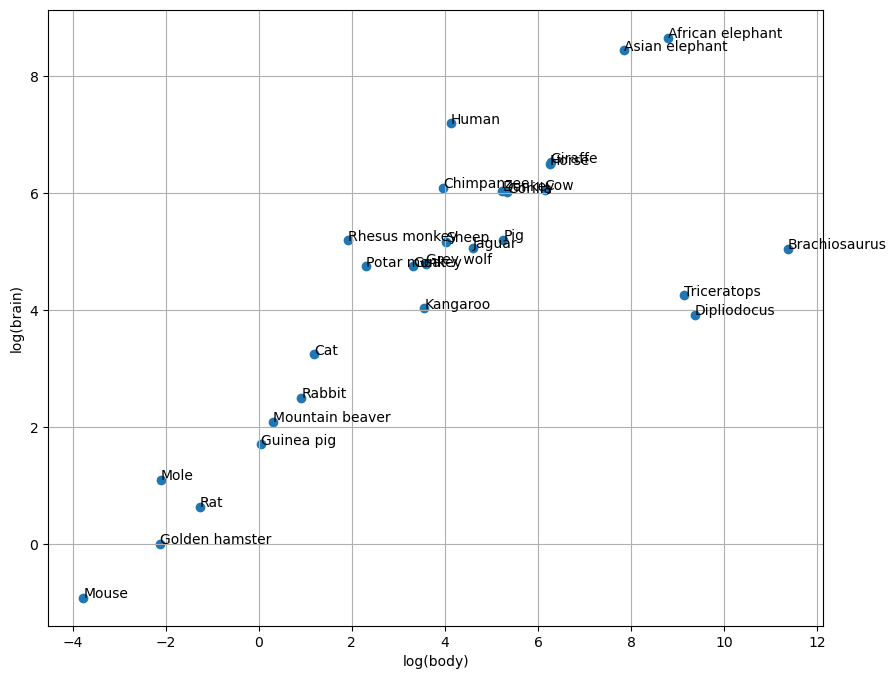

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(body_log, brain_log)
plt.xlabel('log(body)')
plt.ylabel('log(brain)')

for name, x, y in zip(names, body_log, brain_log):
    plt.text(x, y, name)

plt.grid(1)
plt.show()

In [9]:
import mltools.funcs as funcs
import mltools.lossfuncs as lossfuncs
import mltools.models as models
import mltools.gda as gda
import mltools.risks as risks
import mltools as ml

In [10]:
hinge_func = funcs.Square()
loss_func = lossfuncs.ErrorLoss(hinge_func)

In [11]:
linmod = models.LinearModel(1)
linmod.param[:] = np.random.random(2)
gd = ml.regression(body_log[:,None], brain_log, linmod, loss_func)
brain_log_p = linmod.evaluate(body_log[:,None])

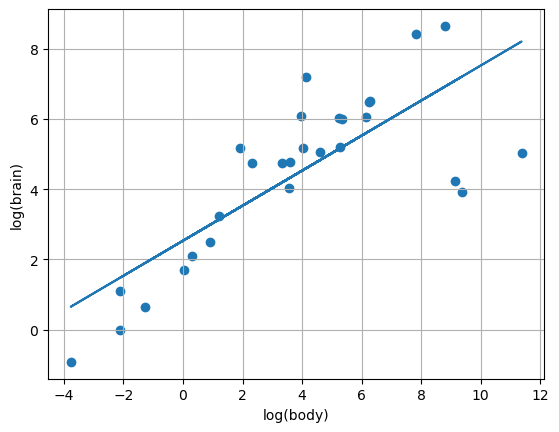

In [12]:
plt.scatter(body_log, brain_log)
plt.plot(body_log, brain_log_p)
plt.xlabel('log(body)')
plt.ylabel('log(brain)')
plt.grid(1)
plt.show()

In [13]:
err = np.abs(brain_log - brain_log_p)

In [14]:
Is = np.argsort(err)
print(Is)

[27 10 22 17 26  1  2 20  3  0 21 12  8  4 11  7  9 24 18 19 23 16 14  6
 13 15 25  5]


In [15]:
err_s = err[Is]

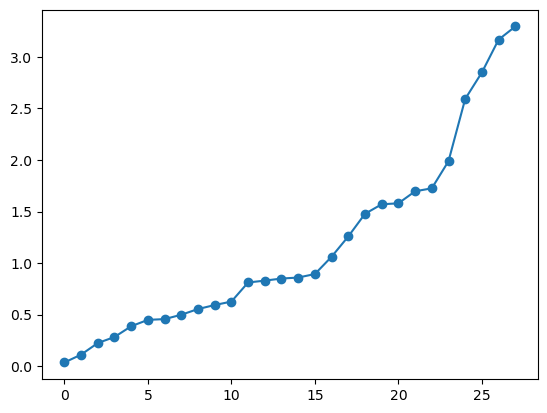

In [16]:
plt.plot(err_s, marker='o')
plt.show()

In [17]:
Is_s = Is[:-4]
brain_log1 = brain_log[Is_s]
body_log1 = body_log[Is_s]

In [18]:
linmod1 = models.LinearModel(1)
linmod1.param[:] = np.random.random(2)
gd1 = ml.regression(body_log1[:,None], brain_log1, linmod1, loss_func)
brain_log1_p = linmod1.evaluate(body_log[:,None])

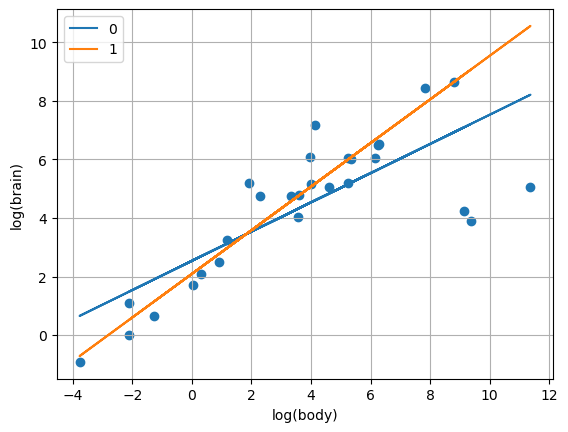

In [19]:
plt.scatter(body_log, brain_log)
plt.plot(body_log, brain_log_p, label='0')
plt.plot(body_log, brain_log1_p, label='1')
plt.xlabel('log(body)')
plt.ylabel('log(brain)')
plt.grid(1)
plt.legend()
plt.show()

In [20]:
err1 = np.abs(brain_log1_p - brain_log)
Is1 = np.argsort(err1)
err1_s = err1[Is1]

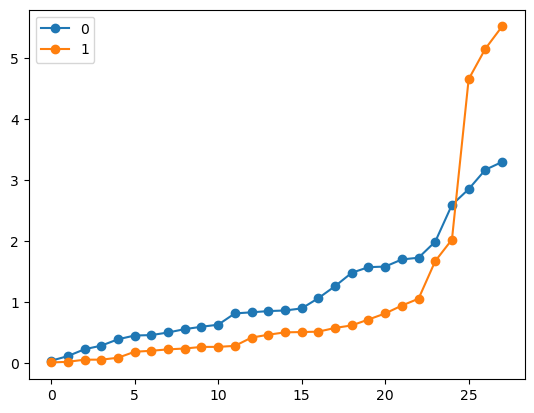

In [21]:
plt.plot(err_s, marker='o', label='0')
plt.plot(err1_s, marker='o', label='1')
plt.legend()
plt.show()

In [22]:
Is1_s = Is1[:-5]
body_log2 = body_log[Is1_s]
brain_log2 = brain_log[Is1_s]

In [23]:
linmod2 = models.LinearModel(1)
linmod2.param[:] = np.random.random(2)
gd2 = ml.regression(body_log2[:,None], brain_log2, linmod2, loss_func)
brain_log2_p = linmod2.evaluate(body_log[:,None])

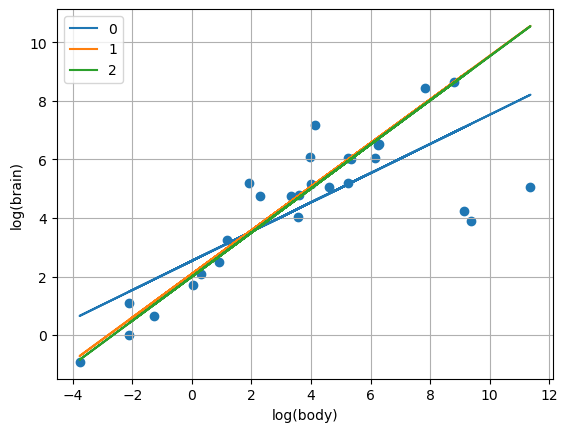

In [24]:
plt.scatter(body_log, brain_log)
plt.plot(body_log, brain_log_p, label='0')
plt.plot(body_log, brain_log1_p, label='1')
plt.plot(body_log, brain_log2_p, label='2')
plt.xlabel('log(body)')
plt.ylabel('log(brain)')
plt.grid(1)
plt.legend()
plt.show()

In [25]:
err2 = np.abs(brain_log2_p - brain_log)
Is2 = np.argsort(err2)
err2_s = err2[Is2]

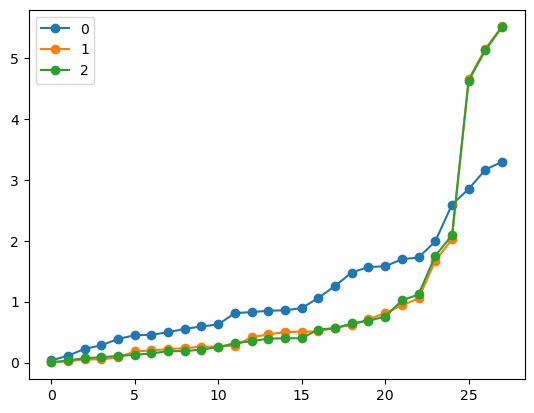

In [26]:
plt.plot(err_s, marker='o', label='0')
plt.plot(err1_s, marker='o', label='1')
plt.plot(err2_s, marker='o', label='2')
plt.legend()
plt.show()